# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361


In [3]:
X = data[['DLGAP4', 'EIF4A1P9', 'FAM172BP', 'GJA9', 'GPR155', 'IL25', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-374M1.2', 'SDR42E1', 'TARBP2', 'TRIM43B', 'VN2R17P']] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []
# X = data[['AC004158.3', 'AC005498.4', 'AC091814.2', 'AC092933.4', 'BSN-AS2', 'CTB-49A3.1', 'GLUD1P4', 'GLULP6', 'LRRC34P1', 'MARCKSL1P2', 'OR2B8P', 'RNA5SP205', 'RNF212', 'RP11-123J14.1', 'RP3-406P24.4']]#'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'GJA9', 'GPR155', 'IL25', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-374M1.2', 'SDR42E1', 'TARBP2', 'TRIM43B', 'VN2R17P']] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
# X = data[['AC004947.2', 'AC103563.8', 'AHCYP3', 'FAM8A3P', 'IGHV1-17', 'NDUFS5P5', 'RNF212', 'RP11-342M3.1', 'RP11-428C6.2', 'RP11-471N19.1', 'RP11-92K15.1', 'RPL12P39', 'RPL31P13', 'SAMMSON', 'SEPW1P']]

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

# As I won't need this columns any more, I deleted them.
data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)


print(X)
print('Numero de pacientes: ',len(Y))

       DLGAP4  EIF4A1P9  FAM172BP      GJA9    GPR155      IL25  LANCL1-AS1  \
0    34.54982  21.37925  21.62929  29.68286  31.81161  21.08036    21.39991   
1    34.06647  21.37925  21.62929  26.80539  31.42781  21.08036    21.39991   
2    34.42561  25.08766  29.29206  30.09292  30.47292  21.08036    21.39991   
3    34.41176  26.76156  21.62929  29.29223  30.72903  21.08036    21.39991   
4    34.29088  21.37925  21.62929  32.00382  31.16114  21.08036    21.39991   
..        ...       ...       ...       ...       ...       ...         ...   
176  34.55658  21.78113  21.49653  28.18967  29.90347  21.43715    21.10533   
177  33.15506  21.78113  21.49653  28.18967  31.66030  21.43715    21.10533   
178  34.68047  21.78113  25.64475  28.18967  31.92039  21.43715    21.10533   
179  35.60014  21.78113  21.49653  33.92530  32.78760  21.43715    21.10533   
180  35.23053  21.78113  21.49653  28.18967  30.59097  21.43715    21.10533   

        LEMD1     PCMT1  RP11-120J4.1  RP11-374M1.2

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=10,
                       random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.7078817733990148


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9444444444444444
Final accuracy on the testing dataset: 0.5945945945945946


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[59  6]
 [ 2 77]]
Input data:  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0]
Prediction:        [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1
 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        65
           1       0.93      0.97      0.95        79

    accuracy                           0.94       144
   macro avg       0.95      0.94      0.94       144
weighted avg       0.95      0.94      0.94       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[10 10]
 [ 5 12]]
Input data:  [1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1]
Prediction:        [1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.55      0.71      0.62        17

    accuracy                           0.59        37
   macro avg       0.61      0.60      0.59        37
weighted avg       0.61      0.59      0.59        37



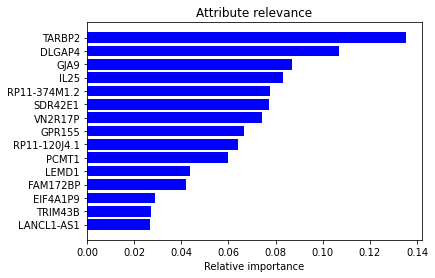

DLGAP4 = 0.10697218956273587
EIF4A1P9 = 0.028842609086332405
FAM172BP = 0.04207976908585925
GJA9 = 0.08699561388002777
GPR155 = 0.0665457762868771
IL25 = 0.08317462833188068
LANCL1-AS1 = 0.026591204565415565
LEMD1 = 0.04359101746757361
PCMT1 = 0.05969761465041096
RP11-120J4.1 = 0.06400880590727422
RP11-374M1.2 = 0.07757969709969181
SDR42E1 = 0.07722285589642379
TARBP2 = 0.13524863554970695
TRIM43B = 0.027006158985896662
VN2R17P = 0.07444342364389342


In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.